In [95]:
# import our dependencies

%matplotlib inline
from collections import Counter
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import numpy as np
import os

## PCA + Oversampling (Random Oversampling) + Logistic Regression (SFRs)

In [96]:
file = 'Hollywood_Hills_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [97]:
path = os.path.join(location, file)

In [98]:
# bring in our dataframe

Hollywood_Hills_df = pd.read_csv(path, index_col='PARCEL')
Hollywood_Hills_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,NAME CHANGE,Other,PERSONAL REP,QUIT CLAIM,RE-RECORD,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5567023035,0,0,1821 Oakden Dr,0,#REF!,1,692637,577201,115436,0,...,0,0,0,1,0,0,0,0,0,0
5569007070,0,0,2235 Hercules Dr,1,0,1,3694769,2126298,1568471,0,...,0,0,0,1,0,0,0,0,0,0
5563024001,0,0,8760 Lookout Mountain Ave,1,#REF!,1,110955,110955,0,0,...,0,0,0,1,0,0,0,0,0,0
5564008023,0,0,8324 Skyline Dr,0,#REF!,1,635221,206629,428592,0,...,0,0,0,1,0,0,0,0,0,0
5560010011,0,0,9191 Thrasher Ave,1,1,1,9028955,6526957,2501998,0,...,0,0,0,1,0,0,0,0,0,0


In [99]:
# drop any nulls

Hollywood_Hills_df = Hollywood_Hills_df.dropna()

In [100]:
len(Hollywood_Hills_df)

6066

In [101]:
# Change the datatype of these two columns into ints

Hollywood_Hills_df['TAXAMT'] = Hollywood_Hills_df['TAXAMT'].astype(int)
Hollywood_Hills_df['EFFYRBLT'] = Hollywood_Hills_df['EFFYRBLT'].astype(int)

In [102]:
# Make sure our dataframe is only SFR's so exclude every property that has an '#' in its site address

Hollywood_Hills_df = Hollywood_Hills_df[~Hollywood_Hills_df['SITEADDRESS'].str.contains('#')]
Hollywood_Hills_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,NAME CHANGE,Other,PERSONAL REP,QUIT CLAIM,RE-RECORD,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5567023035,0,0,1821 Oakden Dr,0,#REF!,1,692637,577201,115436,0,...,0,0,0,1,0,0,0,0,0,0
5569007070,0,0,2235 Hercules Dr,1,0,1,3694769,2126298,1568471,0,...,0,0,0,1,0,0,0,0,0,0
5563024001,0,0,8760 Lookout Mountain Ave,1,#REF!,1,110955,110955,0,0,...,0,0,0,1,0,0,0,0,0,0


In [103]:
len(Hollywood_Hills_df)

6061

In [104]:
# Now drop the SiteAddress column
Hollywood_Hills_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [105]:
Hollywood_Hills_df.head(3)

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,INTERSPOUSAL,JOINT TENANT,NAME CHANGE,Other,PERSONAL REP,QUIT CLAIM,RE-RECORD,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5567023035,0,0,0,#REF!,1,692637,577201,115436,0,7000,...,0,0,0,1,0,0,0,0,0,0
5569007070,0,0,1,0,1,3694769,2126298,1568471,0,0,...,0,0,0,1,0,0,0,0,0,0
5563024001,0,0,1,#REF!,1,110955,110955,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [106]:
APN = Hollywood_Hills_df.index.values
APN

array([5567023035, 5569007070, 5563024001, ..., 2380003028, 5575017033,
       5549025005])

In [107]:
Hollywood_Hills_df['MAIL OUTSIDE CA?'] = Hollywood_Hills_df['MAIL OUTSIDE CA?'].transform(lambda x: x != '0')

In [108]:
Hollywood_Hills_df['MAIL OUTSIDE CA?'].value_counts()

False    5108
True      953
Name: MAIL OUTSIDE CA?, dtype: int64

In [109]:
Hollywood_Hills_df['MAIL OUTSIDE CA?'] = Hollywood_Hills_df['MAIL OUTSIDE CA?'].astype(int)

In [110]:
Hollywood_Hills_df.dtypes

Owned by Trust?                int64
Owned by Business?             int64
MAIL DIFFERENT FROM SITE?      int64
MAIL OUTSIDE CA?               int64
TITLECO1                       int64
ASSDTOTAL                      int64
ASSDLAND                       int64
ASSDSTCT                       int64
ASSDOTHR                       int64
EXEMPTCD                       int64
EXMPTAMT                       int64
PCNTIMPD                       int64
TAXAMT                         int64
DOCDATE_YEAR                   int64
MULTIPARCEL                    int64
PRICE                          int64
LENDER1                        int64
LOANAMOUT1                     int64
LOANTYPE1                      int64
YEARBLT                        int64
EFFYRBLT                       int64
LOTSQFT                        int64
TOTALSF                        int64
GRGTYPE                        int64
BLDGMAT                        int64
TOTUNITS                       int64
QUALCLAS                       int64
B

In [111]:
Hollywood_Hills_df['NOSTORY'] = Hollywood_Hills_df['NOSTORY'].astype(int)

In [112]:
# Step 1: Create our X and y

y = Hollywood_Hills_df['Did it sell?']
X = Hollywood_Hills_df.drop(['Did it sell?'], 1)

In [113]:
# Step 2: Use PCA to reduce dimension to three principal components.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [114]:
X_pca

array([[-1116577.03476504,    64670.11930468,   269005.16280438],
       [ 2965732.6196906 ,   667886.88110095,   729731.15449236],
       [-1038865.0201991 , -1074437.95891631,  -705481.80270763],
       ...,
       [ -260677.34597469,  -770960.83909605,   611868.33367603],
       [-1695034.38402514,  -230573.96160672,  -140829.58384411],
       [-1470840.29416024,  -328492.88108064,  -125709.87384689]])

In [115]:
# Step 3: Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=78, stratify=y)

In [116]:
# Step 4: Scale our data

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit our scaler, named 'scaler' to our data, which produces a new StandardScaler object
# which we call 'X_scaler'
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [117]:
X_train_scaled_APN = []

In [118]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_random_oversampled, y_random_oversampled = ros.fit_resample(X_train_scaled, y_train)

Counter(y_random_oversampled)

Counter({1: 3785, 0: 3785})

In [119]:
# Logistic regression using random oversampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', 
                                max_iter=300,
                                random_state=78,
                                class_weight="balanced")

model.fit(X_random_oversampled, y_random_oversampled)

LogisticRegression(class_weight='balanced', max_iter=300, random_state=78)

In [120]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)

In [121]:
print(f" Logistic regression model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 Logistic regression model accuracy: 0.663


In [122]:
# just for shits n' gigs, lets find the balanced accuracy score

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.5475467012740682

In [123]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="weighted")

0.6953758926063851

In [125]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[910, 352],
       [159,  95]])

In [34]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.85      0.72      0.37      0.78      0.52      0.28      1262
          1       0.21      0.37      0.72      0.27      0.52      0.26       254

avg / total       0.74      0.66      0.43      0.70      0.52      0.28      1516



In [35]:
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test, "PARCEL": y_test.index.values}).reset_index(drop=True)
results.sample(20)

,Prediction,Actual,PARCEL
1487,0,0,5549026055
674,0,0,2425006001
352,1,0,5549016016
433,0,0,2427011001
561,0,0,2380004004
626,0,0,2425012020
1368,1,0,5571028001
136,0,1,5561025001
177,0,0,2380001027
796,1,0,4392004017


In [36]:
Hollywood_Hills_Results_SFRs_df = Hollywood_Hills_df.merge(results, how="left", right_on="PARCEL", left_on="PARCEL")
Hollywood_Hills_Results_SFRs_df.head()

,PARCEL,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,NAME CHANGE,Other,PERSONAL REP,QUIT CLAIM,RE-RECORD,TRUST TRANSFER,TRUSTEES,WARRANTY,Prediction,Actual
0,5567023035,0,0,0,1,1,692637,577201,115436,0,...,0,1,0,0,0,0,0,0,NaN,NaN
1,5569007070,0,0,1,0,1,3694769,2126298,1568471,0,...,0,1,0,0,0,0,0,0,1.0,0.0
2,5563024001,0,0,1,1,1,110955,110955,0,0,...,0,1,0,0,0,0,0,0,NaN,NaN
3,5564008023,0,0,0,1,1,635221,206629,428592,0,...,0,1,0,0,0,0,0,0,NaN,NaN
4,5560010011,0,0,1,1,1,9028955,6526957,2501998,0,...,0,1,0,0,0,0,0,0,NaN,NaN


In [37]:
Hollywood_Hills_Results_SFRs_df

,PARCEL,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,NAME CHANGE,Other,PERSONAL REP,QUIT CLAIM,RE-RECORD,TRUST TRANSFER,TRUSTEES,WARRANTY,Prediction,Actual
0,5567023035,0,0,0,1,1,692637,577201,115436,0,...,0,1,0,0,0,0,0,0,NaN,NaN
1,5569007070,0,0,1,0,1,3694769,2126298,1568471,0,...,0,1,0,0,0,0,0,0,1.0,0.0
2,5563024001,0,0,1,1,1,110955,110955,0,0,...,0,1,0,0,0,0,0,0,NaN,NaN
3,5564008023,0,0,0,1,1,635221,206629,428592,0,...,0,1,0,0,0,0,0,0,NaN,NaN
4,5560010011,0,0,1,1,1,9028955,6526957,2501998,0,...,0,1,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6056,5565026020,0,0,0,0,1,449245,374376,74869,0,...,0,1,0,0,0,0,0,0,0.0,0.0
6057,2380003027,0,1,0,0,1,647208,517767,129441,0,...,0,1,0,0,0,0,0,0,NaN,NaN
6058,2380003028,0,1,0,0,1,811382,649106,162276,0,...,0,1,0,0,0,0,0,0,1.0,0.0
6059,5575017033,0,0,0,0,1,201165,116062,85103,0,...,0,0,0,1,0,0,0,0,NaN,NaN


In [54]:
Hollywood_Hills_Results_SFRs_df = pd.DataFrame(Hollywood_Hills_Results_SFRs_df, columns = ['PARCEL', 'Did it sell?', 'Prediction', 'Warranty'])
Hollywood_Hills_Results_SFRs_df.head()

,PARCEL,Did it sell?,Prediction,Warranty
0,5567023035,0,NaN,NaN
1,5569007070,0,1.0,NaN
2,5563024001,0,NaN,NaN
3,5564008023,0,NaN,NaN
4,5560010011,0,NaN,NaN


In [55]:
Hollywood_Hills_Results_SFRs_df

,PARCEL,Did it sell?,Prediction,Warranty
0,5567023035,0,NaN,NaN
1,5569007070,0,1.0,NaN
2,5563024001,0,NaN,NaN
3,5564008023,0,NaN,NaN
4,5560010011,0,NaN,NaN
...,...,...,...,...
6056,5565026020,0,0.0,NaN
6057,2380003027,0,NaN,NaN
6058,2380003028,0,1.0,NaN
6059,5575017033,1,NaN,NaN


In [56]:
Hollywood_Hills_Results_SFRs_df.to_csv('Hollywood_Hills_Results_SFRs.csv')

# Do the same as above, but with feature reduction

In [72]:
file = 'Hollywood_Hills_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [73]:
path = os.path.join(location, file)

In [74]:
# bring in our dataframe

Hollywood_Hills_df = pd.read_csv(path, index_col='PARCEL')
Hollywood_Hills_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,NAME CHANGE,Other,PERSONAL REP,QUIT CLAIM,RE-RECORD,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5567023035,0,0,1821 Oakden Dr,0,#REF!,1,692637,577201,115436,0,...,0,0,0,1,0,0,0,0,0,0
5569007070,0,0,2235 Hercules Dr,1,0,1,3694769,2126298,1568471,0,...,0,0,0,1,0,0,0,0,0,0
5563024001,0,0,8760 Lookout Mountain Ave,1,#REF!,1,110955,110955,0,0,...,0,0,0,1,0,0,0,0,0,0
5564008023,0,0,8324 Skyline Dr,0,#REF!,1,635221,206629,428592,0,...,0,0,0,1,0,0,0,0,0,0
5560010011,0,0,9191 Thrasher Ave,1,1,1,9028955,6526957,2501998,0,...,0,0,0,1,0,0,0,0,0,0


In [75]:
Hollywood_Hills_df['MAIL OUTSIDE CA?'].value_counts()

0        5113
#REF!     672
1         281
Name: MAIL OUTSIDE CA?, dtype: int64

In [76]:
Hollywood_Hills_df['MAIL OUTSIDE CA?'] = Hollywood_Hills_df['MAIL OUTSIDE CA?'].replace(['#REF!'], '0')

In [77]:
Hollywood_Hills_df['MAIL OUTSIDE CA?'].value_counts()

0    5785
1     281
Name: MAIL OUTSIDE CA?, dtype: int64

In [78]:
# drop any nulls

Hollywood_Hills_df = Hollywood_Hills_df.dropna()

In [79]:
# Change the datatype of these two columns into ints

Hollywood_Hills_df['TAXAMT'] = Hollywood_Hills_df['TAXAMT'].astype(int)
Hollywood_Hills_df['EFFYRBLT'] = Hollywood_Hills_df['EFFYRBLT'].astype(int)

In [80]:
# Make sure our dataframe is only SFR's so exclude every property that has an '#' in its site address

Hollywood_Hills_df = Hollywood_Hills_df[~Hollywood_Hills_df['SITEADDRESS'].str.contains('#')]
Hollywood_Hills_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,NAME CHANGE,Other,PERSONAL REP,QUIT CLAIM,RE-RECORD,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5567023035,0,0,1821 Oakden Dr,0,0,1,692637,577201,115436,0,...,0,0,0,1,0,0,0,0,0,0
5569007070,0,0,2235 Hercules Dr,1,0,1,3694769,2126298,1568471,0,...,0,0,0,1,0,0,0,0,0,0
5563024001,0,0,8760 Lookout Mountain Ave,1,0,1,110955,110955,0,0,...,0,0,0,1,0,0,0,0,0,0


In [81]:
# Now drop the SiteAddress column
Hollywood_Hills_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [82]:
Hollywood_Hills_df['NOSTORY'] = Hollywood_Hills_df['NOSTORY'].astype(int)

In [83]:
Hollywood_Hills_df['PARCEL_1'] = Hollywood_Hills_df.index.values

In [84]:
# Create our X and y values

y = Hollywood_Hills_df['Did it sell?']

X = pd.DataFrame(Hollywood_Hills_df, columns = ['PARCEL_1',
                                                'TOTALSF',
                                                'LOTSQFT',
                                                'ASSDLAND',
                                                'ASSDSTCT',
                                                'ASSDTOTAL',
                                                'TAXAMT',
                                                'EFFYRBLT',
                                                'YEARBLT',
                                                'DOCDATE_YEAR',
                                                'PCNTIMPD',
                                                'LOANAMOUT1',
                                                'PRICE',
                                                'BATHROOMS',
                                                'BEDROOMS',
                                                'EXEMPTCD',
                                                'LOANTYPE1',
                                                'TOTUNITS',
                                                'EXMPTAMT',
                                                'NOSTORY',
                                                'FAMILYRM',
                                                'DININGRM',
                                                'POOL',
                                                'PATIO',
                                                'AIRMTHOD',
                                                'VIEW',
                                                'TITLECO1',
                                                'MAIL OUTSIDE CA?',
                                                'Other',
                                                'MAIL DIFFERENT FROM SITE?',
                                                'QUIT CLAIM',
                                                'Owned by Business?',
                                                'Owned by Trust?'])

In [85]:
# Step 2: Use PCA to reduce dimension to three principal components.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [86]:
# Step 3: Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=78, stratify=y)

In [87]:
# Step 4: Scale our data

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit our scaler, named 'scaler' to our data, which produces a new StandardScaler object
# which we call 'X_scaler'
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [88]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_random_oversampled, y_random_oversampled = ros.fit_resample(X_train_scaled, y_train)

Counter(y_random_oversampled)

Counter({1: 3785, 0: 3785})

In [92]:
# Logistic regression using random oversampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', 
                                max_iter=300,
                                random_state=78,
                                class_weight="balanced")

model.fit(X_random_oversampled, y_random_oversampled)

LogisticRegression(class_weight='balanced', max_iter=300, random_state=78)

In [90]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)

In [91]:
print(f" Logistic regression model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 Logistic regression model accuracy: 0.651


In [93]:
# just for shits n' gigs, lets find the balanced accuracy score

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.5734336199258769

In [94]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="weighted")

0.6896229679694024

# PCA + Oversampling (Random Oversampling) + Logistic Regression (Condos)

In [39]:
# bring in our dataframe

Hollywood_Hills_df = pd.read_csv(path, index_col='PARCEL')
Hollywood_Hills_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,NAME CHANGE,Other,PERSONAL REP,QUIT CLAIM,RE-RECORD,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5567023035,0,0,1821 Oakden Dr,0,#REF!,1,692637,577201,115436,0,...,0,0,0,1,0,0,0,0,0,0
5569007070,0,0,2235 Hercules Dr,1,0,1,3694769,2126298,1568471,0,...,0,0,0,1,0,0,0,0,0,0
5563024001,0,0,8760 Lookout Mountain Ave,1,#REF!,1,110955,110955,0,0,...,0,0,0,1,0,0,0,0,0,0
5564008023,0,0,8324 Skyline Dr,0,#REF!,1,635221,206629,428592,0,...,0,0,0,1,0,0,0,0,0,0
5560010011,0,0,9191 Thrasher Ave,1,1,1,9028955,6526957,2501998,0,...,0,0,0,1,0,0,0,0,0,0


In [40]:
# drop any nulls

Hollywood_Hills_df = Hollywood_Hills_df.dropna()

In [41]:
len(Hollywood_Hills_df)

6066

In [42]:
# Change the datatype of these two columns into ints

Hollywood_Hills_df['TAXAMT'] = Hollywood_Hills_df['TAXAMT'].astype(int)
Hollywood_Hills_df['EFFYRBLT'] = Hollywood_Hills_df['EFFYRBLT'].astype(int)

In [43]:
# Make sure our dataframe is only Condos

Hollywood_Hills_df = Hollywood_Hills_df[Hollywood_Hills_df['SITEADDRESS'].str.contains('#')]
Hollywood_Hills_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,NAME CHANGE,Other,PERSONAL REP,QUIT CLAIM,RE-RECORD,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5572031087,0,0,7218 Hillside Ave #207,1,0,1,517883,197793,320090,0,...,0,0,0,1,0,0,0,0,0,0
5569027024,1,0,2435 Achilles Dr #50,1,0,0,196347,58852,137495,0,...,0,0,0,1,0,0,0,0,0,0
5564018006,0,0,2355 Sunset Heights Dr #19THFLR,1,0,1,672896,538322,134574,0,...,0,0,0,1,0,0,0,0,0,0


In [44]:
len(Hollywood_Hills_df)

5

In [45]:
# Now drop the SiteAddress column
Hollywood_Hills_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [46]:
Hollywood_Hills_df.head(3)

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,INTERSPOUSAL,JOINT TENANT,NAME CHANGE,Other,PERSONAL REP,QUIT CLAIM,RE-RECORD,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5572031087,0,0,1,0,1,517883,197793,320090,0,0,...,0,0,0,1,0,0,0,0,0,0
5569027024,1,0,1,0,0,196347,58852,137495,0,0,...,0,0,0,1,0,0,0,0,0,0
5564018006,0,0,1,0,1,672896,538322,134574,0,0,...,0,0,0,1,0,0,0,0,0,0


In [47]:
Hollywood_Hills_df['NOSTORY'] = Hollywood_Hills_df['NOSTORY'].astype(int)

In [48]:
Hollywood_Hills_df['MAIL OUTSIDE CA?'] = Hollywood_Hills_df['MAIL OUTSIDE CA?'].transform(lambda x: x != '0')

In [49]:
# Step 1: Create our X and y

y = Hollywood_Hills_df['Did it sell?']
X = Hollywood_Hills_df.drop(['Did it sell?'], 1)

In [50]:
APN = Hollywood_Hills_df.index.values
APN

array([5572031087, 5569027024, 5564018006, 5556031026, 5556005006])

In [51]:
# Step 2: Use PCA to reduce dimension to three principal components.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [52]:
X_pca

array([[-322583.48850976,  182460.73199015,  184574.56580473],
       [-751912.32740635, -287388.14295432,    7442.02571331],
       [-172387.22815688,  488863.27805093, -111359.7143446 ],
       [1662371.45194663, -111883.8614588 ,    5980.89817192],
       [-415488.40787364, -272052.00562797,  -86637.77534536]])

In [61]:
# Step 3: Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=78, stratify=y)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [126]:
# Now lets find the discrepencies

In [180]:
file = 'Hollywood_Hills_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [181]:
path = os.path.join(location, file)

In [182]:
# bring in our dataframe

Hollywood_Hills_df = pd.read_csv(path, index_col='PARCEL')
Hollywood_Hills_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,NAME CHANGE,Other,PERSONAL REP,QUIT CLAIM,RE-RECORD,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5567023035,0,0,1821 Oakden Dr,0,#REF!,1,692637,577201,115436,0,...,0,0,0,1,0,0,0,0,0,0
5569007070,0,0,2235 Hercules Dr,1,0,1,3694769,2126298,1568471,0,...,0,0,0,1,0,0,0,0,0,0
5563024001,0,0,8760 Lookout Mountain Ave,1,#REF!,1,110955,110955,0,0,...,0,0,0,1,0,0,0,0,0,0
5564008023,0,0,8324 Skyline Dr,0,#REF!,1,635221,206629,428592,0,...,0,0,0,1,0,0,0,0,0,0
5560010011,0,0,9191 Thrasher Ave,1,1,1,9028955,6526957,2501998,0,...,0,0,0,1,0,0,0,0,0,0


In [183]:
# drop any nulls

Hollywood_Hills_df = Hollywood_Hills_df.dropna()

In [184]:
# Change the datatype of these two columns into ints

Hollywood_Hills_df['TAXAMT'] = Hollywood_Hills_df['TAXAMT'].astype(int)
Hollywood_Hills_df['EFFYRBLT'] = Hollywood_Hills_df['EFFYRBLT'].astype(int)

In [185]:
Hollywood_Hills_df['MAIL OUTSIDE CA?'] = Hollywood_Hills_df['MAIL OUTSIDE CA?'].replace(['#REF!'], '0')
Hollywood_Hills_df['MAIL OUTSIDE CA?'] = Hollywood_Hills_df['MAIL OUTSIDE CA?'].astype(int)

In [186]:
# Make sure our dataframe is only SFR's so exclude every property that has an '#' in its site address

Hollywood_Hills_df = Hollywood_Hills_df[~Hollywood_Hills_df['SITEADDRESS'].str.contains('#')]
Hollywood_Hills_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,NAME CHANGE,Other,PERSONAL REP,QUIT CLAIM,RE-RECORD,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5567023035,0,0,1821 Oakden Dr,0,0,1,692637,577201,115436,0,...,0,0,0,1,0,0,0,0,0,0
5569007070,0,0,2235 Hercules Dr,1,0,1,3694769,2126298,1568471,0,...,0,0,0,1,0,0,0,0,0,0
5563024001,0,0,8760 Lookout Mountain Ave,1,0,1,110955,110955,0,0,...,0,0,0,1,0,0,0,0,0,0


In [187]:
# Now drop the SiteAddress column
Hollywood_Hills_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [188]:
# Now lets split our dataframe into sellers and non-sellers

Hollywood_Hills_Sellers_df = Hollywood_Hills_df[Hollywood_Hills_df['Did it sell?'] == 1]
Hollywood_Hills_Sellers_df.head()

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,INTERSPOUSAL,JOINT TENANT,NAME CHANGE,Other,PERSONAL REP,QUIT CLAIM,RE-RECORD,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5570016012,0,1,1,0,1,2020000,1616000,404000,0,0,...,0,0,0,1,0,0,0,0,0,0
5551010040,1,0,1,0,1,5422294,3743818,1678476,0,7000,...,0,0,0,1,0,0,0,0,0,0
5549007011,0,0,0,0,1,2884146,1409171,1474975,0,7000,...,0,0,0,1,0,0,0,0,0,0
5570005004,0,0,0,0,0,1017060,626460,390600,0,7000,...,0,0,0,0,0,1,0,0,0,0
5558026005,1,0,1,0,1,1812185,1449748,362437,0,0,...,0,0,0,1,0,0,0,0,0,0


In [189]:
Hollywood_Hills_NonSellers_df = Hollywood_Hills_df[Hollywood_Hills_df['Did it sell?'] == 0]
Hollywood_Hills_NonSellers_df.head()

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,INTERSPOUSAL,JOINT TENANT,NAME CHANGE,Other,PERSONAL REP,QUIT CLAIM,RE-RECORD,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5567023035,0,0,0,0,1,692637,577201,115436,0,7000,...,0,0,0,1,0,0,0,0,0,0
5569007070,0,0,1,0,1,3694769,2126298,1568471,0,0,...,0,0,0,1,0,0,0,0,0,0
5563024001,0,0,1,0,1,110955,110955,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5564008023,0,0,0,0,1,635221,206629,428592,0,7000,...,0,0,0,1,0,0,0,0,0,0
5560010011,0,0,1,1,1,9028955,6526957,2501998,0,0,...,0,0,0,1,0,0,0,0,0,0


In [190]:
# Absentee Owners

sum(Hollywood_Hills_Sellers_df['MAIL DIFFERENT FROM SITE?'] == 1) / len(Hollywood_Hills_Sellers_df) * 100

40.72978303747535

In [191]:
sum(Hollywood_Hills_NonSellers_df['MAIL DIFFERENT FROM SITE?'] == 1) / len(Hollywood_Hills_NonSellers_df) * 100

33.207846245294235

In [192]:
# Outside CA

sum(Hollywood_Hills_Sellers_df['MAIL OUTSIDE CA?'] == 1) / len(Hollywood_Hills_Sellers_df) * 100

4.733727810650888

In [193]:
sum(Hollywood_Hills_NonSellers_df['MAIL OUTSIDE CA?'] == 1) / len(Hollywood_Hills_NonSellers_df) * 100

4.616603923122647

In [195]:
# Assessed Value

Hollywood_Hills_Sellers_df['ASSDTOTAL'].mean()

1553954.378698225

In [196]:
Hollywood_Hills_NonSellers_df['ASSDTOTAL'].mean()

1307137.5644937586

In [197]:
# Total Sq Ft

Hollywood_Hills_Sellers_df['TOTALSF'].mean()

2450.8382642998026

In [198]:
Hollywood_Hills_NonSellers_df['TOTALSF'].mean()

2490.8444620566675

In [199]:
# Avg Year Built

Hollywood_Hills_Sellers_df['YEARBLT'].mean()

1956.0867850098618

In [200]:
Hollywood_Hills_NonSellers_df['YEARBLT'].mean()

1954.8058252427184

In [201]:
# Avg Last Sale Price

Hollywood_Hills_Sellers_df['PRICE'][Hollywood_Hills_Sellers_df['PRICE'] != 0].mean()

2019140.6208178438

In [202]:
Hollywood_Hills_NonSellers_df['PRICE'][Hollywood_Hills_NonSellers_df['PRICE'] != 0].mean()

1731087.6953327572

In [203]:
# Avg Year of Purchase

Hollywood_Hills_Sellers_df['DOCDATE_YEAR'][Hollywood_Hills_Sellers_df['DOCDATE_YEAR'] != 0].mean()

2010.8303747534517

In [204]:
Hollywood_Hills_NonSellers_df['DOCDATE_YEAR'][Hollywood_Hills_NonSellers_df['DOCDATE_YEAR'] != 0].mean()

2009.130770754904

In [205]:
# Avg Tax Amount

Hollywood_Hills_Sellers_df['TAXAMT'][Hollywood_Hills_Sellers_df['TAXAMT'] != 0].mean()

18806.115384615383

In [206]:
Hollywood_Hills_NonSellers_df['TAXAMT'][Hollywood_Hills_NonSellers_df['TAXAMT'] != 0].mean()

15871.872993857738

In [207]:
# Avg Loan Amount

Hollywood_Hills_Sellers_df['LOANAMOUT1'][Hollywood_Hills_Sellers_df['LOANAMOUT1'] != 0].mean()

1250280.0618762474

In [208]:
Hollywood_Hills_NonSellers_df['LOANAMOUT1'][Hollywood_Hills_NonSellers_df['LOANAMOUT1'] != 0].mean()

915094.9253852393

# Lets make some charts

In [209]:
file = 'Hollywood_Hills_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [210]:
path = os.path.join(location, file)

In [211]:
# bring in our dataframe

Hollywood_Hills_df = pd.read_csv(path, index_col='PARCEL')
Hollywood_Hills_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,NAME CHANGE,Other,PERSONAL REP,QUIT CLAIM,RE-RECORD,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5567023035,0,0,1821 Oakden Dr,0,#REF!,1,692637,577201,115436,0,...,0,0,0,1,0,0,0,0,0,0
5569007070,0,0,2235 Hercules Dr,1,0,1,3694769,2126298,1568471,0,...,0,0,0,1,0,0,0,0,0,0
5563024001,0,0,8760 Lookout Mountain Ave,1,#REF!,1,110955,110955,0,0,...,0,0,0,1,0,0,0,0,0,0
5564008023,0,0,8324 Skyline Dr,0,#REF!,1,635221,206629,428592,0,...,0,0,0,1,0,0,0,0,0,0
5560010011,0,0,9191 Thrasher Ave,1,1,1,9028955,6526957,2501998,0,...,0,0,0,1,0,0,0,0,0,0


In [212]:
# Drop any nulls

Hollywood_Hills_df = Hollywood_Hills_df.dropna()

In [213]:
# Make sure its only SFR's

Hollywood_Hills_df = Hollywood_Hills_df[~Hollywood_Hills_df['SITEADDRESS'].str.contains('#')]
Hollywood_Hills_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,NAME CHANGE,Other,PERSONAL REP,QUIT CLAIM,RE-RECORD,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5567023035,0,0,1821 Oakden Dr,0,#REF!,1,692637,577201,115436,0,...,0,0,0,1,0,0,0,0,0,0
5569007070,0,0,2235 Hercules Dr,1,0,1,3694769,2126298,1568471,0,...,0,0,0,1,0,0,0,0,0,0
5563024001,0,0,8760 Lookout Mountain Ave,1,#REF!,1,110955,110955,0,0,...,0,0,0,1,0,0,0,0,0,0


In [214]:
# Tidy up the troublesome columns
Hollywood_Hills_df['TAXAMT'] = Hollywood_Hills_df['TAXAMT'][Hollywood_Hills_df['TAXAMT'] != 0]
Hollywood_Hills_df['ASSDTOTAL'] = Hollywood_Hills_df['ASSDTOTAL'][Hollywood_Hills_df['ASSDTOTAL'] != 0]
Hollywood_Hills_df['LOANAMOUT1'] = Hollywood_Hills_df['LOANAMOUT1'][Hollywood_Hills_df['LOANAMOUT1'] != 0]
Hollywood_Hills_df['PRICE'] = Hollywood_Hills_df['PRICE'][Hollywood_Hills_df['PRICE'] != 0]
Hollywood_Hills_df['DOCDATE_YEAR'] = Hollywood_Hills_df['DOCDATE_YEAR'][Hollywood_Hills_df['DOCDATE_YEAR'] != 0]

In [215]:
# Split into sellers and non-sellers
HH_Sellers_df = Hollywood_Hills_df[Hollywood_Hills_df['Did it sell?'] == 1]
HH_Sellers_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,NAME CHANGE,Other,PERSONAL REP,QUIT CLAIM,RE-RECORD,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5570016012,0,1,7825 Torreyson Dr,1,0,1,2020000,1616000,404000,0,...,0,0,0,1,0,0,0,0,0,0
5551010040,1,0,7655 Curson Ter,1,0,1,5422294,3743818,1678476,0,...,0,0,0,1,0,0,0,0,0,0
5549007011,0,0,7104 Macapa Dr,0,0,1,2884146,1409171,1474975,0,...,0,0,0,1,0,0,0,0,0,0
5570005004,0,0,2801 La Castana Dr,0,#REF!,0,1017060,626460,390600,0,...,0,0,0,0,0,1,0,0,0,0
5558026005,1,0,1600 N Kings Rd,1,0,1,1812185,1449748,362437,0,...,0,0,0,1,0,0,0,0,0,0


In [216]:
HH_NonSellers_df = Hollywood_Hills_df[Hollywood_Hills_df['Did it sell?'] == 0]
HH_NonSellers_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,NAME CHANGE,Other,PERSONAL REP,QUIT CLAIM,RE-RECORD,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5567023035,0,0,1821 Oakden Dr,0,#REF!,1,692637,577201,115436,0,...,0,0,0,1,0,0,0,0,0,0
5569007070,0,0,2235 Hercules Dr,1,0,1,3694769,2126298,1568471,0,...,0,0,0,1,0,0,0,0,0,0
5563024001,0,0,8760 Lookout Mountain Ave,1,#REF!,1,110955,110955,0,0,...,0,0,0,1,0,0,0,0,0,0
5564008023,0,0,8324 Skyline Dr,0,#REF!,1,635221,206629,428592,0,...,0,0,0,1,0,0,0,0,0,0
5560010011,0,0,9191 Thrasher Ave,1,1,1,9028955,6526957,2501998,0,...,0,0,0,1,0,0,0,0,0,0


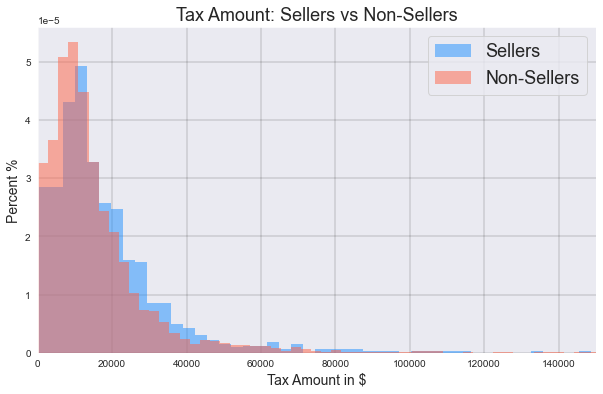

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Tax Amount

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(HH_Sellers_df['TAXAMT'], bins=150, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(HH_NonSellers_df['TAXAMT'], bins=150, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Tax Amount: Sellers vs Non-Sellers', fontsize=18)
ax.set_xlabel('Tax Amount in $', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)
ax.set_facecolor('#eaeaf1')


ax.set_xlim(0,150000)
plt.savefig('HollywoodHills_TaxAmount_DensityDistribution_SFR.png')

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


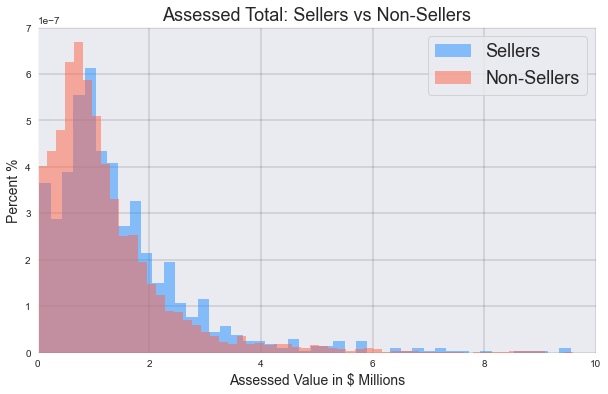

In [232]:
# 2. Assessed Total

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(HH_Sellers_df['ASSDTOTAL'], bins=200, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(HH_NonSellers_df['ASSDTOTAL'], bins=200, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Assessed Total: Sellers vs Non-Sellers', fontsize=18)
ax.set_xlabel('Assessed Value in $ Millions', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)
ax.set_facecolor('#eaeaf1')
ax.set_xticklabels([0, 2, 4, 6, 8, 10])

ax.set_xlim(0,10000000)
plt.savefig('HollywoodHills_AssessedTotal_DensityDistribution_SFR.png')

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


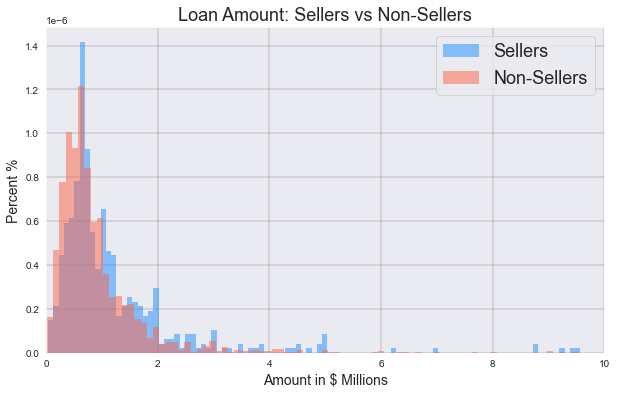

In [238]:
# 3. Loan Amount

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(HH_Sellers_df['LOANAMOUT1'], bins=200, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(HH_NonSellers_df['LOANAMOUT1'], bins=200, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Loan Amount: Sellers vs Non-Sellers', fontsize=18)
ax.set_xlabel('Amount in $ Millions', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)
ax.set_facecolor('#eaeaf1')
ax.set_xticklabels([0, 2, 4, 6, 8, 10])

ax.set_xlim(0,10000000)
plt.savefig('HollywoodHills_LoanAmount_DensityDistribution_SFR.png')

In [236]:
HH_Sellers_df['LOANAMOUT1'].mean()

1250280.0618762474

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


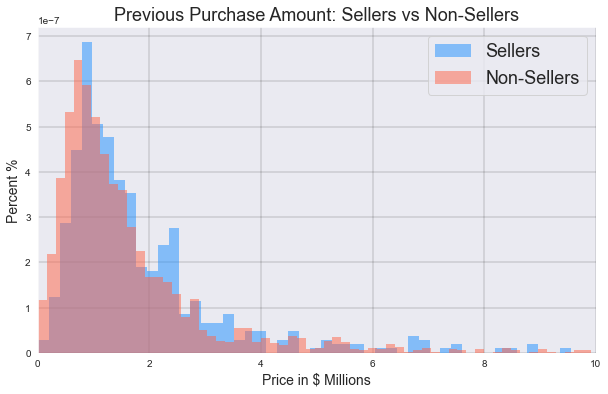

In [243]:
# 4. Price

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(HH_Sellers_df['PRICE'], bins=200, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(HH_NonSellers_df['PRICE'], bins=200, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Previous Purchase Amount: Sellers vs Non-Sellers', fontsize=18)
ax.set_xlabel('Price in $ Millions', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)
ax.set_facecolor('#eaeaf1')
ax.set_xticklabels([0, 2, 4, 6, 8, 10])

ax.set_xlim(0,10000000)
plt.savefig('HollywoodHills_PreviousPurchasePrice_DensityDistribution_SFR.png')

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


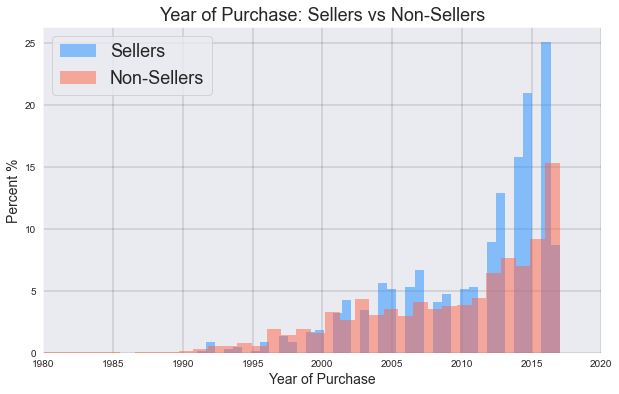

In [253]:
# 5. DocDate Year

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(HH_Sellers_df['DOCDATE_YEAR'], bins=40, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(HH_NonSellers_df['DOCDATE_YEAR'], bins=40, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Year of Purchase: Sellers vs Non-Sellers', fontsize=18)
ax.set_xlabel('Year of Purchase', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)
ax.set_facecolor('#eaeaf1')
ax.set_yticklabels([0, 5, 10, 15, 20, 25])

ax.set_xlim(1980, 2020)
plt.savefig('HollywoodHills_YearOfPurchase_DensityDistribution_SFR.png')